<h1>REGIONE CAMPANIA</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE CAMPANIA ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Campania</b> dal <b>2015</b> al <b>30 gigno 2020</b>.

In [21]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/campania.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,5891
1,2015-02-28,4994
2,2015-03-31,4857
3,2015-04-30,4364
4,2015-05-31,4053


In [22]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [23]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,4790
63,2020-04-30,4192
64,2020-05-31,3780
65,2020-06-30,3441


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [24]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    4790
2020-04-30    4192
2020-05-31    3780
2020-06-30    3441
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE ABRUZZO CAMPANIA DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Campania</b> da <b> marzo 2020</b> al <b>30 giugno 2020</b>.

In [25]:
covid = pd.read_csv('../../csv/regioni_pesate/campania.csv')
covid.head()

,data,deceduti
0,2020-03-31,119.966
1,2020-04-30,203.852
2,2020-05-31,47.806
3,2020-06-30,18.040


In [26]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [27]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,119.966
2020-04-30,203.852
2020-05-31,47.806
2020-06-30,18.040


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [28]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Campania</b> secondo la predizione del modello SARIMA applicato. 

In [29]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_campania.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,5833.829813
2,2015-03-31,5081.331780
3,2015-04-30,4897.385789
4,2015-05-31,4358.787057


In [30]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,5833.829813
2,2015-03-31,5081.331780
3,2015-04-30,4897.385789
4,2015-05-31,4358.787057


In [31]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [32]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,4315.912703
63,2020-04-30,3770.537942
64,2020-05-31,3231.820691
65,2020-06-30,3264.945897


In [33]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,4315.912703
2020-04-30,3770.537942
2020-05-31,3231.820691
2020-06-30,3264.945897


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [34]:
predictions = predictions.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Campania</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b> e <b>giugno</b>.

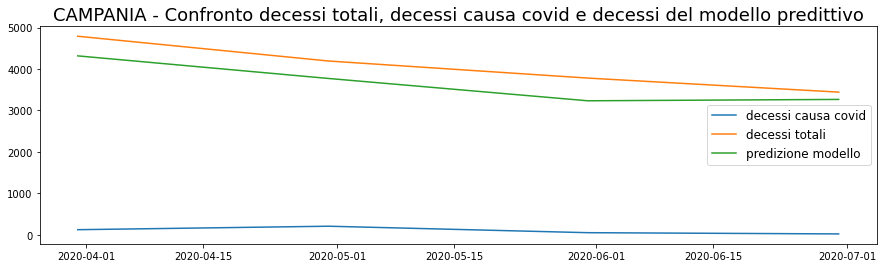

In [35]:
plt.figure(figsize=(15,4))
plt.title('CAMPANIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

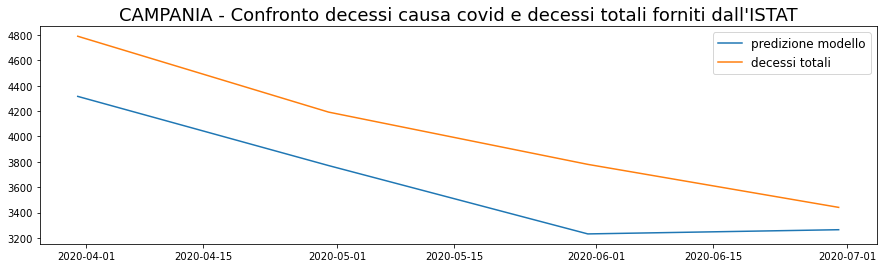

In [36]:
plt.figure(figsize=(15,4))
plt.title("CAMPANIA - Confronto decessi causa covid e decessi totali forniti dall'ISTAT", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

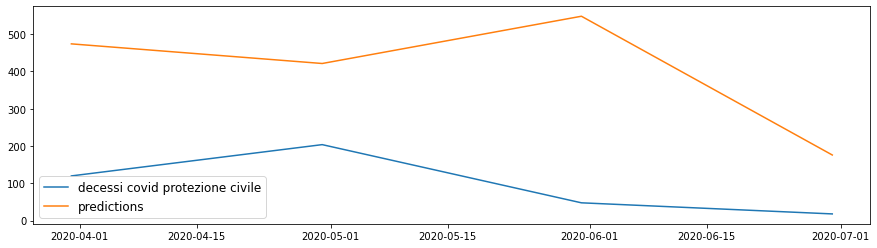

In [37]:
n = decessi_istat - predictions

plt.figure(figsize=(15,4))
plt.plot(covid, label='decessi covid protezione civile')
plt.plot(n, label='predictions')
plt.legend(prop={'size': 12})
plt.show()

<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Campania </h3>

In [38]:
total = n.sum()
print(int(total))

1619


<h3>Numero totale dei decessi COVID-19 regione Campania </h3>

In [39]:
m = covid.sum()
print(int(m))

389


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Campania</h3>

In [40]:
# numero di decessi non registrati
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

1230
